# Best and Worst Places to cycle in London

##### Ever since being hit by a van while cycling I have been curious to know which areas in London are statistically safe for me to cycle in.. This notebook is my brief attempt at an answer.

Here I do a bit of data wrangling and visualisations while noticing some interesting trends.

### Source of data: 
I acknowledge Transport for London (TfL) as the source of data contained in this notebook.

Powered by TfL Open Data

Contains OS data © Crown copyright and database rights 2016' and Geomni UK Map data © and database rights [2019]

In [1]:
#Modules to import 
import os, glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected = True)
cf.go_offline()

In [3]:
%matplotlib inline
plt.style.use('ggplot')

In [4]:
#Checking the order in which the files are read
for filename in glob.glob('*.csv'):
    print(filename)

2011.csv
2012.csv
2013.csv
2014.csv
2015.csv
2016.csv
2017.csv
2018.csv
2019.csv
2020.csv
2021.csv


In [5]:
#Reading each of the csv files into pandas DataFrame
all_data = []

for filename in glob.glob('*.csv'):
    all_data.append( pd.read_csv( filename ) )

In [6]:
#Adding a year column in each DataFrame according to the year the data was obtained
years = np.linspace(2011, 2021, 11).astype("int").astype("object")

for year, data in zip(years, all_data):
    data["Year"] = year

## 1) Brief Data Preprocessing

#### In this section, we choose the columns (attributes) to explore, standardise the column names and concat 'all_data' into a single DataFrame according to the chosen attributes.

In [7]:
#Choosing the attributes we want to explore so that we can later concat each elements of 'all_data' accordingly

#First let's compare the number of columns present in year DataFrame in 'all_data'
for data in all_data:
    print( data.columns.size)

22
22
22
22
22
22
22
22
21
22
21


We see that some of the DataFrame have one more columns. At a closer look we find that this additional column in empty: index = 20.

In [8]:
all_data[0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43445 entries, 0 to 43444
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   AREFNO                 43445 non-null  object
 1   Borough                43445 non-null  object
 2   Boro                   43445 non-null  int64 
 3   Easting                43445 non-null  int64 
 4   Northing               43445 non-null  int64 
 5   Vehicle Ref.           43445 non-null  int64 
 6   Vehicle Type           43445 non-null  object
 7   Vehicle Type (Banded)  43445 non-null  object
 8   Vehicle Manoeuvres     43445 non-null  object
 9   Vehicle Skidding       43445 non-null  object
 10  Restricted Lane        43445 non-null  object
 11  Junction Location      43445 non-null  object
 12  Object in C/W          43445 non-null  object
 13  Veh. Leaving C/W       43445 non-null  object
 14  Veh. off C/W           43445 non-null  object
 15  Veh. Impact        

In [9]:
#Removing the empty column, where application
for data in all_data:
    if data.columns.size == 22:
        data.drop(columns = [' '], inplace = True)

all_data[0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43445 entries, 0 to 43444
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   AREFNO                 43445 non-null  object
 1   Borough                43445 non-null  object
 2   Boro                   43445 non-null  int64 
 3   Easting                43445 non-null  int64 
 4   Northing               43445 non-null  int64 
 5   Vehicle Ref.           43445 non-null  int64 
 6   Vehicle Type           43445 non-null  object
 7   Vehicle Type (Banded)  43445 non-null  object
 8   Vehicle Manoeuvres     43445 non-null  object
 9   Vehicle Skidding       43445 non-null  object
 10  Restricted Lane        43445 non-null  object
 11  Junction Location      43445 non-null  object
 12  Object in C/W          43445 non-null  object
 13  Veh. Leaving C/W       43445 non-null  object
 14  Veh. off C/W           43445 non-null  object
 15  Veh. Impact        

#### From the above cell we decide to look at attributes: 
- Borough
- Vehicle Type (Banded) 
- Driver Sex
- Driver Age
- Year

Not all DataFrames in 'all_data' have the same column format, namely the 2021 dataset. Thus, we amend this but only present the code to do so, for simplicity.

In [10]:
#Changing the format of 2021 DataFrame
all_data[-1].rename( columns = {"Borough Name": "Borough", "Vehicle Type Banded" : "Vehicle Type (Banded)", 
                                "Driver Gender": "Driver Sex"}, inplace = True)

Now, let's drop the unwanted attributes.

In [11]:
#Creating new list, 'amended_data', containing the DataFrames in 'all_data' with the chosen attributes
attributes = [ "Year", "Borough", "Vehicle Type (Banded)", "Driver Age", "Driver Sex" ]
amended_data = []

for data in all_data:
    amended_data.append( data[attributes] )

In [12]:
#Checking the DataFrames in 'amended_data' all have the same column names
for data in amended_data:
    print( data.columns == amended_data[0].columns )

[ True  True  True  True  True]
[ True  True  True  True  True]
[ True  True  True  True  True]
[ True  True  True  True  True]
[ True  True  True  True  True]
[ True  True  True  True  True]
[ True  True  True  True  True]
[ True  True  True  True  True]
[ True  True  True  True  True]
[ True  True  True  True  True]
[ True  True  True  True  True]


We are ready to concat all the DataFrames into one.

In [13]:
#DataFrame containing the data of vehicle accidents in London from 2011-2021
vehicle_accidents = pd.concat( amended_data )
vehicle_accidents.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 483972 entries, 0 to 42831
Data columns (total 5 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Year                   483972 non-null  int64  
 1   Borough                483972 non-null  object 
 2   Vehicle Type (Banded)  483972 non-null  object 
 3   Driver Age             455941 non-null  float64
 4   Driver Sex             483958 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 22.2+ MB


## 2) Some Data Wrangling

#### In this section, we standardise the categorical variables and clean the data, making it ready for exploratory analysis.

We see that the format of the Borough names aren't all the same (as there are 32 boroughs and +1 for city of London).

In [14]:
vehicle_accidents[["Borough"]].value_counts().count() == 33

False

In [15]:
#Standardising the Borough names
vehicle_accidents["Borough"] = vehicle_accidents["Borough"].apply(lambda x: x.title())
vehicle_accidents["Borough"].value_counts().count() == 33

True

We still need to format the other categorical columns: Vehicle Type (Banded) and Driver Sex and explore the Driver Age numerical values.

In [16]:
#Replacing NaN values in Driver Sex column
vehicle_accidents["Driver Sex"].replace(np.nan, "Not Traced", inplace = True) 

#Standardising the Driver Sex column through replacement 

#Finding the unique entries in Driver Sex column
uniq_sex = []
for sex in vehicle_accidents["Driver Sex"].unique():
    if sex == "Male" or sex == "Female" or sex == "Not Traced":
        continue
        
    else:
        uniq_sex.append( sex )

#Populating a conversion dictionary later used to replace values in the Driver Sex column
dict_sex = {}

for sex in uniq_sex:
    if "male" in sex.lower() and "f" not in sex.lower():
        dict_sex[sex] = "Male"
        
    elif "female" in sex.lower():
        dict_sex[sex] = "Female"
        
    else:
        dict_sex[sex] = "Not Traced"
dict_sex

{'2 Female': 'Female',
 '1 Male': 'Male',
 '3 Not Traced': 'Not Traced',
 '1 MALE': 'Male',
 '3 NOT TRACED': 'Not Traced',
 '2 FEMALE': 'Female'}

In [17]:
#Replacing the entries of Driver Sex column according to dict_sex
for key, value in dict_sex.items():
    vehicle_accidents["Driver Sex"].replace(key, value, inplace = True)
vehicle_accidents["Driver Sex"].value_counts()

Male          325769
Female         98484
Not Traced     59719
Name: Driver Sex, dtype: int64

Next, we clean the Vehicle Type (Banded) column.

In [18]:
#No NaN values in Vehicle Type (Banded) column
vehicle_accidents["Vehicle Type (Banded)"].isna().sum()

0

In [19]:
vehicle_accidents["Vehicle Type (Banded)"].value_counts()

3 Car                            212816
3 CAR                             49469
2 Powered 2 wheeler               45152
1 Pedal cycle                     38947
7 Goods vehicles                  26558
Car                               23828
6 Bus/coach excldng minibus       15882
4 Taxi                            14325
2 POWERED 2 WHEELER               11882
1 PEDAL CYCLE                      9886
Powered 2 Wheeler                  6825
7 GOODS VEHICLE                    6438
Pedal Cycle                        5597
Goods Vehicle                      3143
8 Other                            3017
4 TAXI                             1888
5 PRIVATE HIRE                     1427
13 LONDON BUS                      1322
Bus Or Coach                       1237
6 BUS/COACH EXCLUDING MINIBUS      1216
Other Vehicle                       844
8 OTHER VEHICLE                     829
Taxi                                750
Private Hire                        608
10 MINIBUS                           73


We see that the categories need to be cleaned. We will use the following categories:

- Car
- Powered 2 wheeler -> Bike
- Pedal cycle -> Cycle
- Taxi
- Bus (including minibus)
- Other

Although the categories set is small, we try to avoid direct brute force method of replacement.

In [20]:
#Categories to pickout from unique entries in the Vehicle Type (Banded) column
vCategory = set(["car", "powered 2 wheeler", "cycle", "taxi", "bus"])

#Populating a conversion dictionary
dict_vcat = {}

for cat in vCategory:
    for vtype in vehicle_accidents["Vehicle Type (Banded)"].unique():
        if cat == vtype.lower():
            continue
            
        else:
            if cat in vtype.lower():
                dict_vcat[vtype] = cat
                
#Replacing the non-unique categories with our choice of vCategory
for key, value in dict_vcat.items():
    vehicle_accidents["Vehicle Type (Banded)"].replace(key, value.title(), inplace = True)
    
#Rename powered 2 wheeler -> bike
vehicle_accidents["Vehicle Type (Banded)"].replace("Powered 2 Wheeler", "Bike", inplace = True)

#Changing the remaining vehicle types to Other
vCategory = set(["car", "bike", "cycle", "taxi", "bus", "other"])

for vtype in vehicle_accidents["Vehicle Type (Banded)"].unique():
    if vtype.lower() not in vCategory:
        vehicle_accidents["Vehicle Type (Banded)"].replace( vtype, "Other", inplace = True)

In [21]:
#The unique categories after the Vehicle Type (Banded) column was reformatted 
vehicle_accidents["Vehicle Type (Banded)"].value_counts()

Car      286113
Bike      63859
Cycle     54430
Other     42877
Bus       19730
Taxi      16963
Name: Vehicle Type (Banded), dtype: int64

In [22]:
#Renaming column Vehicle Type (Banded) -> Vehicle
vehicle_accidents.rename(columns = {"Vehicle Type (Banded)": "Vehicle"}, inplace = True)
vehicle_accidents.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 483972 entries, 0 to 42831
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Year        483972 non-null  int64  
 1   Borough     483972 non-null  object 
 2   Vehicle     483972 non-null  object 
 3   Driver Age  455941 non-null  float64
 4   Driver Sex  483972 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 22.2+ MB


Lastly, let's check the Driver Age column.

In [31]:
vehicle_accidents["Driver Age"].isna().sum()/vehicle_accidents["Driver Age"].count() * 100

6.147944580548799

Although there exists around 6% of NaN values in the Driver Age column, we choose to leave it since we do not explore any statistics according to age.

## 3) Data Visualisation

#### In this section, we visualise some key statistics of the full dataset involving all the recorded road accidents in London between 2011-2021.

Text(2016, 42000, 'Covid19 Lockdown')

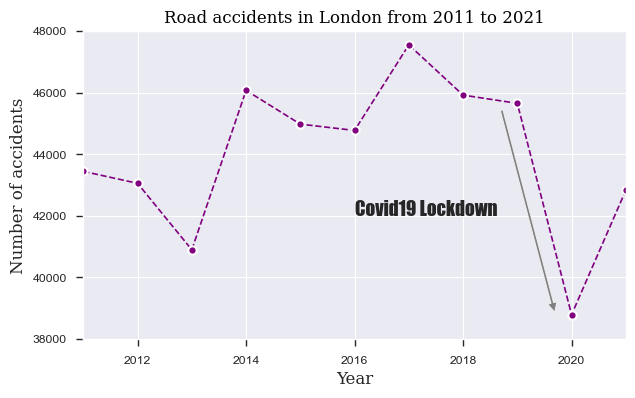

In [157]:
#Yearly total accidents plot using groupby and seaborn
yearly_total = vehicle_accidents.groupby("Year").count()

#set global parameters like font and label sizes
sns.set_context('paper')

#Creating a figure object to set size
fig = plt.figure( figsize = (7,4) )

#Creating a lineplot using seaborn (produces axes object)
ax = sns.lineplot(x = "Year", y = "Vehicle", data = yearly_total, linestyle = '--', color = 'purple', marker = 'o', markersize = 6, markeredgewidth = 1.5)

#Set title: family is font
ax.set_title("Road accidents in London from 2011 to 2021", size = 12, color = 'black', family = 'serif')

#Setting axis labels and range etc
ax.set_xlim(2011,2021)
ax.set_ylim(38000,48000)
ax.set_ylabel("Number of accidents", family = 'serif', size = 12)
ax.set_xlabel("Year", family = 'serif', size = 12)

#Creating an arrow starting at xytext -> xy. Arrowprops sets the properties of the arrow
ax.annotate("", xy = (2019.7,38800), xytext = (2018.7,45500), arrowprops = dict( facecolor='grey',width=2.0,headwidth=7.0,headlength=7.0,shrink=0.01 ))

#Adding a text at (x,y) = (2016, 42000)
ax.text(2016, 42000, "Covid19 Lockdown", fontsize = "x-large", family = "fantasy")

We see a sharp 15% decrease in the number of vehicle accidents from 2019 to 2020. This most likely can be attributed to the covid19 lockdowns.

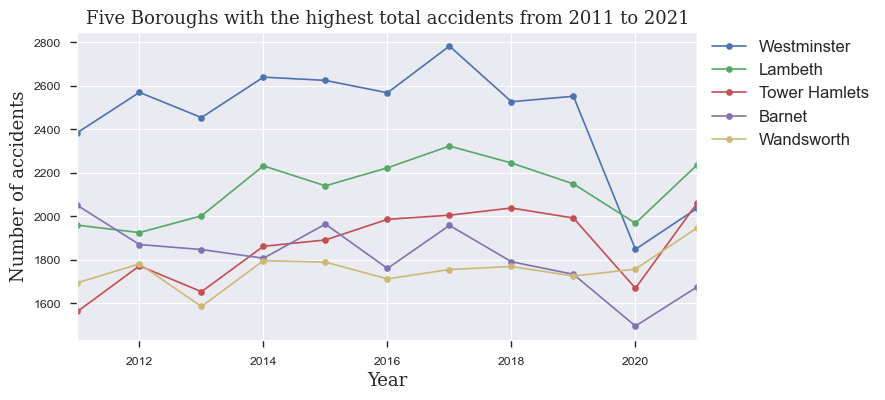

In [81]:
#Top 5 total accidents by Borough using groupby method and DataFrame plot
top5_boro = vehicle_accidents.Borough.value_counts().sort_values(ascending = False).head().index

#Extracting the accidents by borough per year, sorted by the top 5 total accidents and using DataFrame plot; figsize here is parameter of .plot()
ax1 = vehicle_accidents[["Year", "Borough"]].groupby(["Year", "Borough"])["Borough"].count().unstack()[top5_boro].plot( 
    figsize = (8,4), marker = 'o' )

#Setting title and axis labels and range
ax1.set_title("Five Boroughs with the highest total accidents from 2011 to 2021", family = 'serif', fontsize = 13)
ax1.set_xlabel("Year", family = 'serif', fontsize = 13)
ax1.set_ylabel("Number of accidents", family = 'serif', fontsize = 13)
ax1.set_xlim(2011,2021)

#Moving the legend outside of the plot body
ax1.legend(loc = "center left", bbox_to_anchor = (1, 0.8), fontsize = 12)

Why is there an increase in accidents from 2019 to 2020 in Wandsworth when all other have relatively sharp drop...?

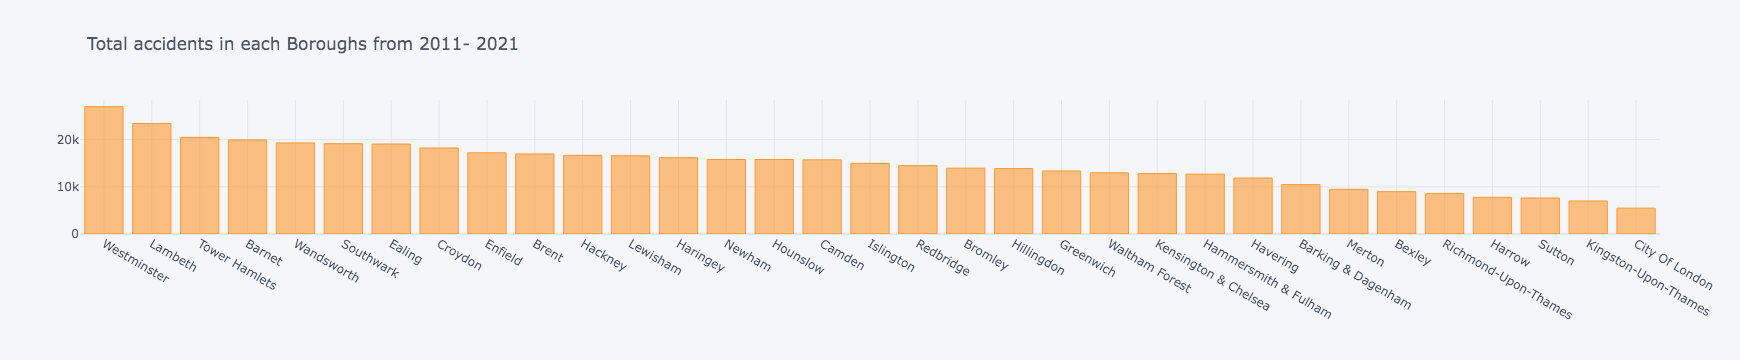

In [128]:
#Bar chart of total accidents by Borough between 2011-2021 using plotly for interaction
vehicle_accidents.groupby("Borough")["Borough"].count().sort_values(ascending = False).to_frame().rename(columns = {"Borough": "Total Accidents"}).reset_index().iplot(kind = "bar", 
title = "Total accidents in each Boroughs from 2011- 2021", x = "Borough", y = "Total Accidents")

## 4) Data Visualisation: Cycles

#### Finally we focus just on cycles (pedal bikes) and answer the title question!

In [130]:
#Creating a dataframe just containing cycles
cycle_accidents = vehicle_accidents[ vehicle_accidents[ "Vehicle"] == "Cycle" ].reset_index()
cycle_accidents.head()

,index,Year,Borough,Vehicle,Driver Age,Driver Sex
0,15,2011,City Of London,Cycle,40.0,Male
1,22,2011,City Of London,Cycle,63.0,Female
2,24,2011,City Of London,Cycle,21.0,Male
3,29,2011,City Of London,Cycle,37.0,Male
4,32,2011,City Of London,Cycle,28.0,Female


Text(2019.7, 5050, '')

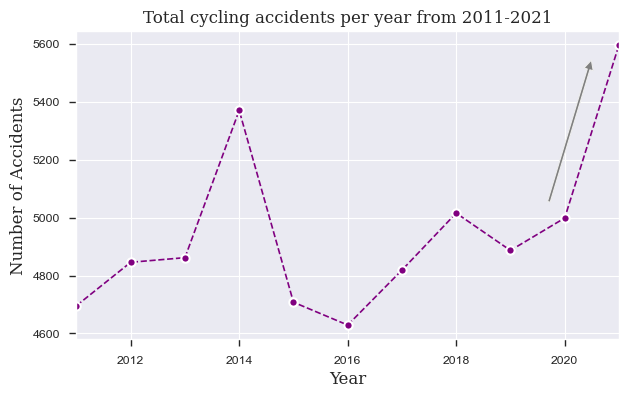

In [158]:
#Using groupby along with seaborn; same as done for all vehicles
yearly_cycle = cycle_accidents.groupby(["Year"]).count()

#Creating a figure object just to control size
fig2 = plt.figure( figsize = (7,4))

#Creating a lineplot using seaborn
ax2 = sns.lineplot(x = "Year", y = "Borough", data = yearly_cycle, linestyle = '--', color = 'purple', marker = 'o', markersize = 6, markeredgewidth = 1.5)

#Set title
ax2.set_title("Total cycling accidents per year from 2011-2021", family = "serif", size = 12)

#Formatting the axis
ax2.set_xlim(2011,2021)
ax2.set_ylabel("Number of Accidents", fontsize = 12, family = "serif")
ax2.set_xlabel("Year", fontsize = 12, family = "serif")

#Creating an arrow starting at xy -> xytext. Arrowprops sets the properties of the arrow
ax2.annotate("", xytext = (2019.7,5050), xy = (2020.5,5550), arrowprops = dict( facecolor='grey',width=2.0,headwidth=7.0,headlength=7.0,shrink=0.01 ))

We see a 12% increase in cycling accidents from 2020 to 2021. This might be due to an increase in cycle ownership and usage, post covid19 lockdowns (need some data to confirm). 

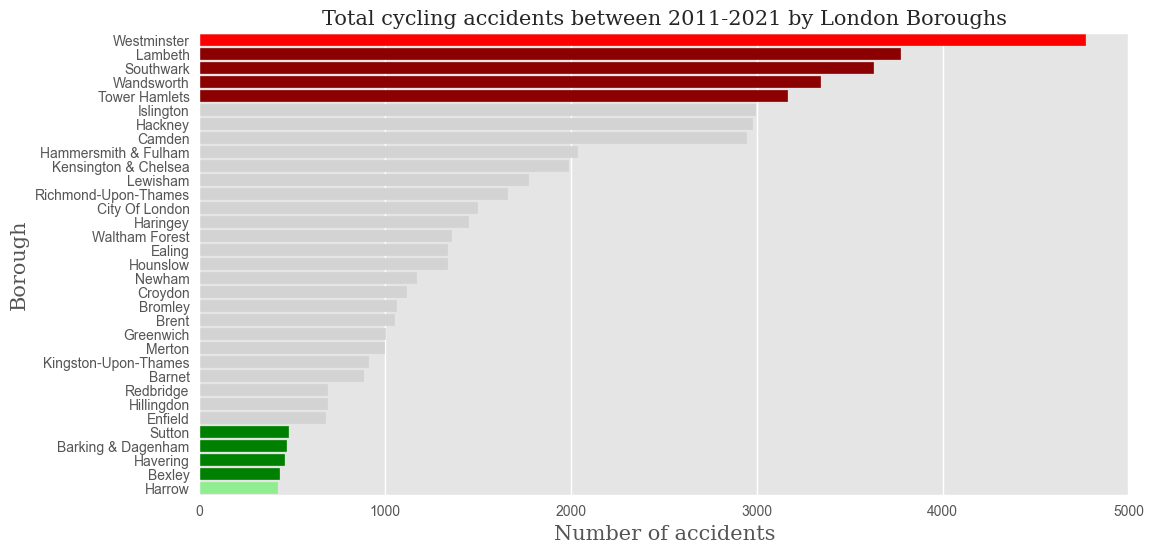

In [183]:
#Using seaborn count plot instead of groupby; countplot automatically counts the unique categorical entries in a column

#Figure object
fig3 = plt.figure( figsize = (12,6) )

#Seaborn countplot; orient = 'h' makes the bars horizontal, order orders...
ax3 = sns.countplot(y = "Borough", data = cycle_accidents, order = cycle_accidents.Borough.value_counts().index, orient = "h")

#Title
ax3.set_title("Total cycling accidents between 2011-2021 by London Boroughs", fontsize = 15, family = 'serif')

#Axis labels
ax3.set_xlabel("Number of accidents", fontsize = 15, family = 'serif')
ax3.set_ylabel("Borough", fontsize = 15, family = 'serif')


#Setting colour according to number of accidents

#Largest and smallest count; axes object with bar graph has an attribute patches (list) containing the bar objects
ax3.patches[0].set_color('red')
ax3.patches[-1].set_color('lightgreen')

#Setting colour for the remaining bar depending if in top 5 or not
for index in range(1, len(ax3.patches) - 1 ):
    if index in range(1,5):
        ax3.patches[index].set_color('darkred') #Top 5 most dangerous
        
    elif index in range(len(ax3.patches) - 5, len(ax3.patches) - 1):
        ax3.patches[index].set_color('green') #Top 5 safest
        
    else:
        ax3.patches[index].set_color('lightgrey') #Remaining

## 5) Conclusion 

#### So there we have it. Westminster is the scariest place to cycle in. 
Next time you want to enjoy the view of southbank from across the Thames, stick to cycleway 3!


## Author 

Abhay Shrestha